## Reduksi Dimensi menggunakan PCA

In [10]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

data = {'feature_1': [random.uniform(0, 1) for i in range(100)],
        'feature_2': [random.uniform(0, 1) for i in range(100)],
        'feature_3': [random.uniform(0, 1) for i in range(100)],
        'feature_4': [random.uniform(0, 1) for i in range(100)],
        'feature_5': [random.uniform(0, 1) for i in range(100)],
        'feature_6': [random.uniform(0, 1) for i in range(100)],
        'feature_7': [random.uniform(0, 1) for i in range(100)],
        'feature_8': [random.uniform(0, 1) for i in range(100)],
        'feature_9': [random.uniform(0, 1) for i in range(100)],
        'feature_10': [random.uniform(0, 1) for i in range(100)],  
        'label': [random.choice(['A', 'B', 'C']) for i in range(100)]}

df = pd.DataFrame(data)
df.head

<bound method NDFrame.head of     feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0    0.163931   0.201022   0.081551   0.418627   0.248022   0.843778   
1    0.370353   0.810285   0.529029   0.838828   0.022222   0.376073   
2    0.545442   0.136919   0.219081   0.784717   0.478047   0.056735   
3    0.916739   0.801509   0.994532   0.530914   0.025221   0.696847   
4    0.128660   0.342453   0.059096   0.441849   0.414202   0.647088   
..        ...        ...        ...        ...        ...        ...   
95   0.454429   0.008974   0.964710   0.490982   0.008472   0.923095   
96   0.599349   0.082412   0.250653   0.244278   0.318495   0.155829   
97   0.912271   0.851213   0.412437   0.664220   0.152200   0.102427   
98   0.737823   0.509556   0.911640   0.522154   0.200367   0.636998   
99   0.208361   0.268480   0.497655   0.861521   0.358616   0.044289   

    feature_7  feature_8  feature_9  feature_10 label  
0    0.642979   0.229401   0.538077    0.058682  

In [11]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.163931,0.201022,0.081551,0.418627,0.248022,0.843778,0.642979,0.229401,0.538077,0.058682
1,0.370353,0.810285,0.529029,0.838828,0.022222,0.376073,0.504291,0.762727,0.815287,0.592844
2,0.545442,0.136919,0.219081,0.784717,0.478047,0.056735,0.009254,0.174426,0.009795,0.336983
3,0.916739,0.801509,0.994532,0.530914,0.025221,0.696847,0.657214,0.126963,0.022011,0.732925
4,0.128660,0.342453,0.059096,0.441849,0.414202,0.647088,0.416394,0.216532,0.582573,0.348095
...,...,...,...,...,...,...,...,...,...,...
95,0.454429,0.008974,0.964710,0.490982,0.008472,0.923095,0.577599,0.845680,0.789223,0.841041
96,0.599349,0.082412,0.250653,0.244278,0.318495,0.155829,0.192786,0.231609,0.685012,0.430267
97,0.912271,0.851213,0.412437,0.664220,0.152200,0.102427,0.042639,0.909912,0.157449,0.534401
98,0.737823,0.509556,0.911640,0.522154,0.200367,0.636998,0.251995,0.917796,0.608928,0.951674


Reduksi dimensi menggunakan PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

setelah membuat class, kita lakukan fit transform pada data fitur, jadi nantinya 10 kolom g=fitur di atas akan di proses menggunakan teknik PCA sehingga akan mengelarkan 2 kolom baru hasil reduksi

In [14]:
fit_pca = pca.fit_transform(x)

buat data frame baru dari hasil fit

In [15]:
pca_df = pd.DataFrame(data=fit_pca, columns=['PCA_1','PCA_2'])
pca_df

finalDF = pd.concat([pca_df,df[['label']]],axis=1)
finalDF

,PCA_1,PCA_2,label
0,-0.167654,0.552522,B
1,-0.567847,0.242670,B
2,0.014403,-0.274437,C
3,-0.177907,-0.531175,B
4,-0.082124,0.364830,C
...,...,...,...
95,-0.733285,-0.010830,B
96,-0.002407,0.087132,B
97,-0.325410,-0.023490,C
98,-0.544897,-0.206903,A


buat scatter plot nya

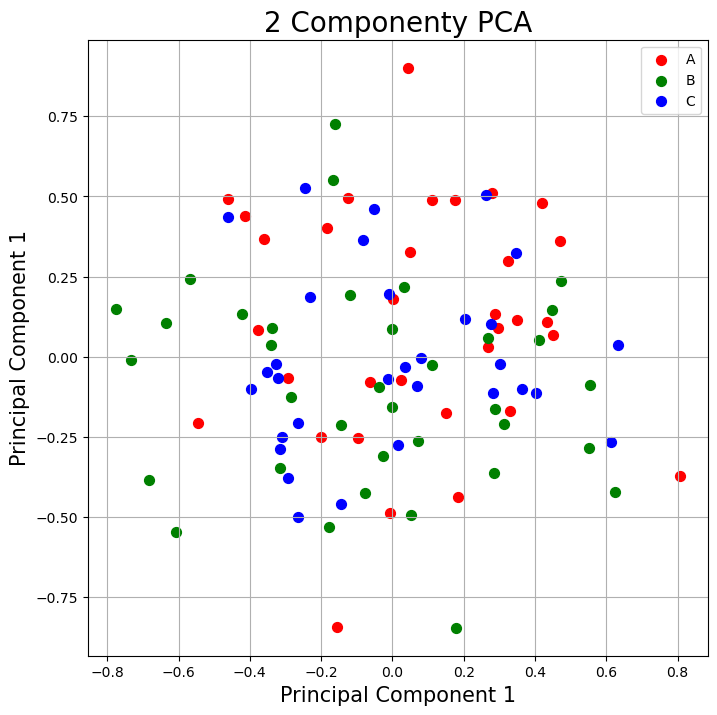

In [19]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 1', fontsize=15)
ax.set_title('2 Componenty PCA', fontsize=20)

targets = ['A','B','C']
colors = ['r','g','b']
for target, color in zip(targets,colors):
    indicesToKepp = finalDF['label']==target
    ax.scatter(finalDF.loc[indicesToKepp,'PCA_1'],
               finalDF.loc[indicesToKepp,'PCA_2'],
               c=color,
               s=50
               )
ax.legend(targets)
ax.grid()

## Reduksi Dimensi menggunakan LDA

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [21]:
iris = datasets.load_iris()

#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [23]:
#define predictor and response variables

x = df[['s_length','s_width','p_length','p_width']]
y = df['species']

model = LinearDiscriminantAnalysis()
model.fit(x,y)

LinearDiscriminantAnalysis()

In [24]:
#defince method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model,x,y,scoring='accuracy',cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9800000000000001


In [25]:
#define new observation
new = [5,3,1,4]
model.predict([new])

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['virginica'], dtype='<U10')

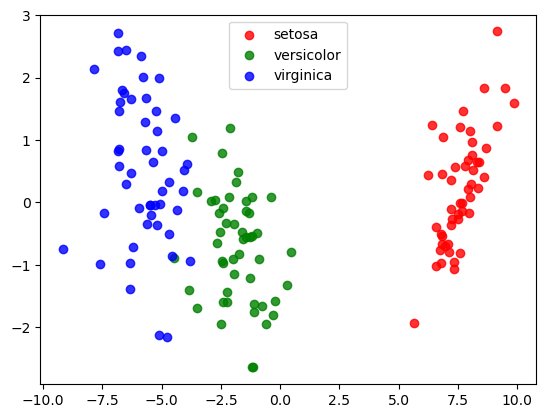

In [26]:
#define data to plot
x = iris.data
y = iris.target
model=LinearDiscriminantAnalysis()
data_plot = model.fit(x,y).transform(x)
target_names = iris.target_names

#create LDA plot
plt.figure()
colors = ['red','green','blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
  plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
              label=target_name)
  
#add legend
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()